In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
import numpy as np
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("housing.csv")
df = df.dropna()
df_cleaned = df.copy()
df_cleaned = pd.get_dummies(df_cleaned, columns=["ocean_proximity"], dtype=int)
df_cleaned["total_bedrooms"] = df_cleaned["total_bedrooms"].fillna(
    df_cleaned["total_bedrooms"].median()
)

X = df_cleaned[
    [
        "longitude",
        "latitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_house_value",
        "ocean_proximity_<1H OCEAN",
        "ocean_proximity_INLAND",
        "ocean_proximity_NEAR BAY",
    ]
]
y = df["median_income"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(y.shape, X.shape)

X = torch.tensor(np.array(X_scaled)).type(dtype=torch.float32)
y = torch.tensor(np.array(y)).type(dtype=torch.float32)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


class Housing(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=11, out_features=13)
        self.Layer2 = nn.Linear(in_features=13, out_features=20)
        self.Layer3 = nn.Linear(in_features=20, out_features=1)
        self.ReLU = nn.ReLU()

    def forward(self, X):
        return self.Layer3(self.ReLU(self.Layer2(self.ReLU(self.Layer1(X)))))


torch.manual_seed(42)
model24 = Housing()

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model24.parameters(), lr=0.001)

epochs = 2000

for epoch in range(epochs):
    model24.train()
    y_preds = model24(X_train).squeeze()
    loss = loss_fn(y_preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model24.eval()
    with torch.inference_mode():
        y_test_preds = model24(X_test).squeeze()
        test_loss = loss_fn(y_test_preds, y_test)
        epoch

    if epoch % 100== 0:
        print(
            f"Epoch: {epoch} | Training Loss: {loss.item()} | Testing Loss: {test_loss.item()}"
        )

(994,) (994, 11)
Epoch: 0 | Training Loss: 18.008617401123047 | Testing Loss: 16.433095932006836
Epoch: 100 | Training Loss: 6.539267539978027 | Testing Loss: 5.470961570739746
Epoch: 200 | Training Loss: 1.682843804359436 | Testing Loss: 1.3966796398162842
Epoch: 300 | Training Loss: 1.1163277626037598 | Testing Loss: 0.985255777835846
Epoch: 400 | Training Loss: 0.9510884881019592 | Testing Loss: 0.8466863632202148
Epoch: 500 | Training Loss: 0.8612774610519409 | Testing Loss: 0.762153685092926
Epoch: 600 | Training Loss: 0.7941935062408447 | Testing Loss: 0.711181640625
Epoch: 700 | Training Loss: 0.7392607927322388 | Testing Loss: 0.690418541431427
Epoch: 800 | Training Loss: 0.6927170157432556 | Testing Loss: 0.6685400605201721
Epoch: 900 | Training Loss: 0.6552479267120361 | Testing Loss: 0.6498381495475769
Epoch: 1000 | Training Loss: 0.6244643926620483 | Testing Loss: 0.6371546983718872
Epoch: 1100 | Training Loss: 0.5862229466438293 | Testing Loss: 0.6301469802856445
Epoch: 12

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("housing.csv")

# -------------------------------
# UPDATE: Handle missing values
# -------------------------------
df = df.dropna()  # drop rows with missing values (simple approach)

df_cleaned = df.copy()

# One-hot encoding for categorical column
df_cleaned = pd.get_dummies(df_cleaned, columns=["ocean_proximity"], dtype=int)

# No need to fill total_bedrooms after dropna, but keeping safety
df_cleaned["total_bedrooms"] = df_cleaned["total_bedrooms"].fillna(
    df_cleaned["total_bedrooms"].median()
)

# Feature selection
X = df_cleaned[
    [
        "longitude",
        "latitude",
        "housing_median_age",
        "total_rooms",
        "total_bedrooms",
        "population",
        "households",
        "median_house_value",
        "ocean_proximity_<1H OCEAN",
        "ocean_proximity_INLAND",
        "ocean_proximity_NEAR BAY",
    ]
]

# Target variable
y = df["median_income"].values.reshape(-1, 1)

y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

y = torch.tensor(y_scaled, dtype=torch.float32).squeeze()

# -------------------------------
# UPDATE: Feature Scaling (Very Important)
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors
X = torch.tensor(np.array(X_scaled), dtype=torch.float32)
y = torch.tensor(np.array(y), dtype=torch.float32)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -------------------------------
# UPDATE: Neural Network with ReLU
# -------------------------------
class Housing(nn.Module):
    def __init__(self):
        super().__init__()
        self.Layer1 = nn.Linear(in_features=11, out_features=13)
        self.Layer2 = nn.Linear(in_features=13, out_features=20)
        self.Layer3 = nn.Linear(in_features=20, out_features=1)
        self.ReLU = nn.ReLU()  # Non-linearity

    def forward(self, X):
        # UPDATE: Using ReLU between layers (better for learning)
        X = self.ReLU(self.Layer1(X))
        X = self.ReLU(self.Layer2(X))
        return self.Layer3(X)


# Reproducibility
torch.manual_seed(42)

model24 = Housing()

# Loss function (Mean Squared Error for regression)
loss_fn = nn.MSELoss()

# -------------------------------
# UPDATE: Lower learning rate (stability)
# -------------------------------
optimizer = torch.optim.Adam(params=model24.parameters(), lr=0.0005)

epochs = 1000

epochValues = []
lossValues = []
testLossValues = []


for epoch in range(epochs):
    model24.train()

    # Forward pass
    y_preds = model24(X_train).squeeze()

    # -------------------------------
    # UPDATE: Correct loss order (predictions first)
    # -------------------------------
    loss = loss_fn(y_preds, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Evaluation
    model24.eval()
    with torch.inference_mode():
        y_test_preds = model24(X_test).squeeze()
        test_loss = loss_fn(y_test_preds, y_test)

    # Print progress every 20 epochs
        if epoch % 20 == 0:
            epochValues.append(epoch)
            lossValues.append(loss.detach().item())
            testLossValues.append(test_loss)
            print(
                f"Epoch: {epoch} | Training Loss: {loss.item()} | Testing Loss: {test_loss.item()}"
            )



C:\Users\Haji Suleman\AppData\Local\Temp\ipykernel_11632\3109672180.py:60: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y = torch.tensor(np.array(y), dtype=torch.float32)


Epoch: 0 | Training Loss: 1.0470306873321533 | Testing Loss: 0.85666424036026
Epoch: 20 | Training Loss: 0.9907930493354797 | Testing Loss: 0.80319744348526
Epoch: 40 | Training Loss: 0.9292519092559814 | Testing Loss: 0.7436577081680298
Epoch: 60 | Training Loss: 0.8458612561225891 | Testing Loss: 0.6658174395561218
Epoch: 80 | Training Loss: 0.7423845529556274 | Testing Loss: 0.5733669996261597
Epoch: 100 | Training Loss: 0.6363466382026672 | Testing Loss: 0.48168012499809265
Epoch: 120 | Training Loss: 0.5407956838607788 | Testing Loss: 0.4026115834712982
Epoch: 140 | Training Loss: 0.465734601020813 | Testing Loss: 0.344007283449173
Epoch: 160 | Training Loss: 0.41112014651298523 | Testing Loss: 0.3053702712059021
Epoch: 180 | Training Loss: 0.3743809461593628 | Testing Loss: 0.2821577489376068
Epoch: 200 | Training Loss: 0.34981459379196167 | Testing Loss: 0.2677740156650543
Epoch: 220 | Training Loss: 0.33183255791664124 | Testing Loss: 0.25736936926841736
Epoch: 240 | Training L

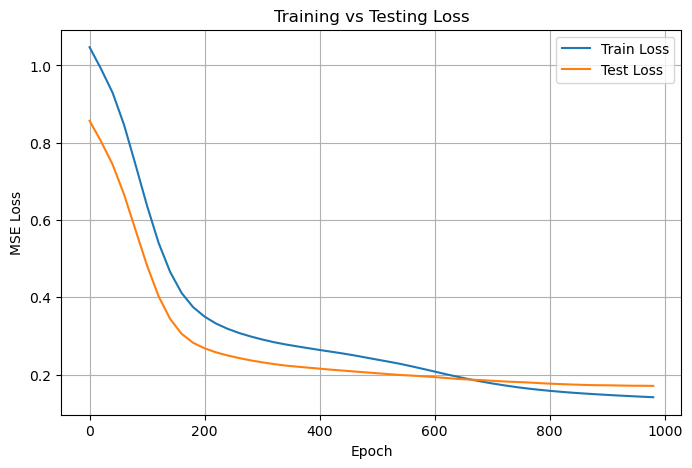

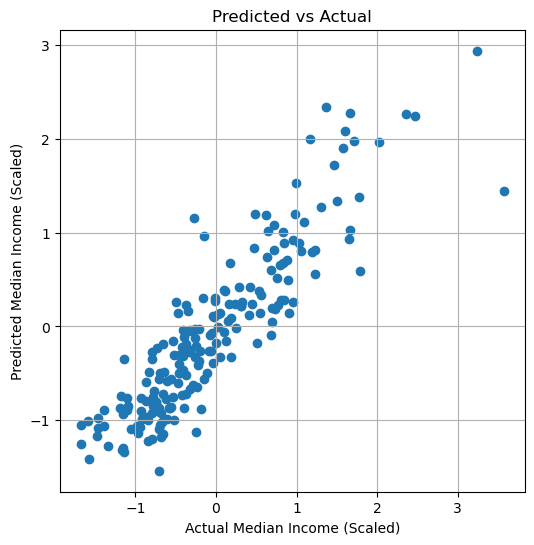

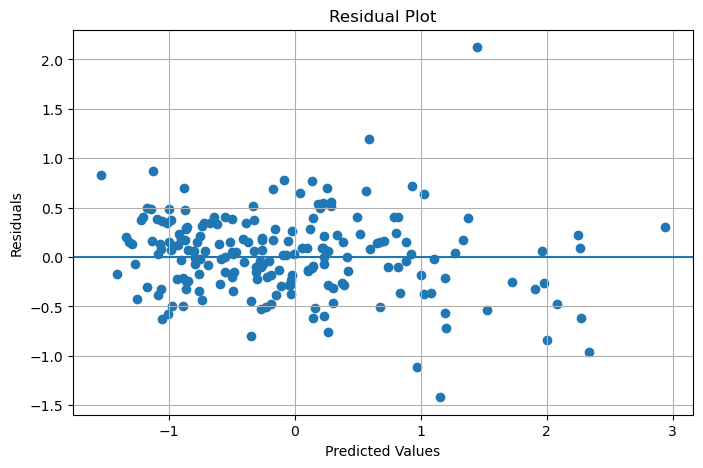

In [39]:
plt.figure(figsize=(8, 5))

plt.plot(epochValues, lossValues)
plt.plot(epochValues, [t.detach().item() for t in testLossValues])

plt.title("Training vs Testing Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(["Train Loss", "Test Loss"])
plt.grid(True)

plt.show()

model24.eval()
with torch.inference_mode():
    preds = model24(X_test).squeeze()

plt.figure(figsize=(6, 6))

plt.scatter(y_test.detach().numpy(), preds.detach().numpy())
plt.xlabel("Actual Median Income (Scaled)")
plt.ylabel("Predicted Median Income (Scaled)")
plt.title("Predicted vs Actual")
plt.grid(True)

plt.show()


residuals = y_test - preds

plt.figure(figsize=(8, 5))

plt.scatter(preds.detach().numpy(), residuals.detach().numpy())
plt.axhline(y=0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)

plt.show()

In [40]:

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,-122.155392,37.739497,37.479879,2386.973843,485.169014,1218.883300,461.636821,3.843837,209744.277666
std,0.116537,0.097813,13.215546,2060.034105,385.080909,995.364686,365.321412,1.814328,89182.337058
min,-122.340000,37.470000,2.000000,12.000000,4.000000,18.000000,7.000000,0.499900,60000.000000
25%,-122.250000,37.680000,28.000000,1275.250000,261.000000,663.250000,253.250000,2.562500,148150.000000
50%,-122.180000,37.760000,39.000000,1898.000000,391.000000,969.000000,367.000000,3.511950,195750.000000
75%,-122.080000,37.810000,51.000000,2841.750000,565.750000,1445.500000,538.000000,4.905275,254350.000000
max,-121.610000,37.900000,52.000000,28258.000000,3864.000000,12203.000000,3701.000000,13.499000,500001.000000


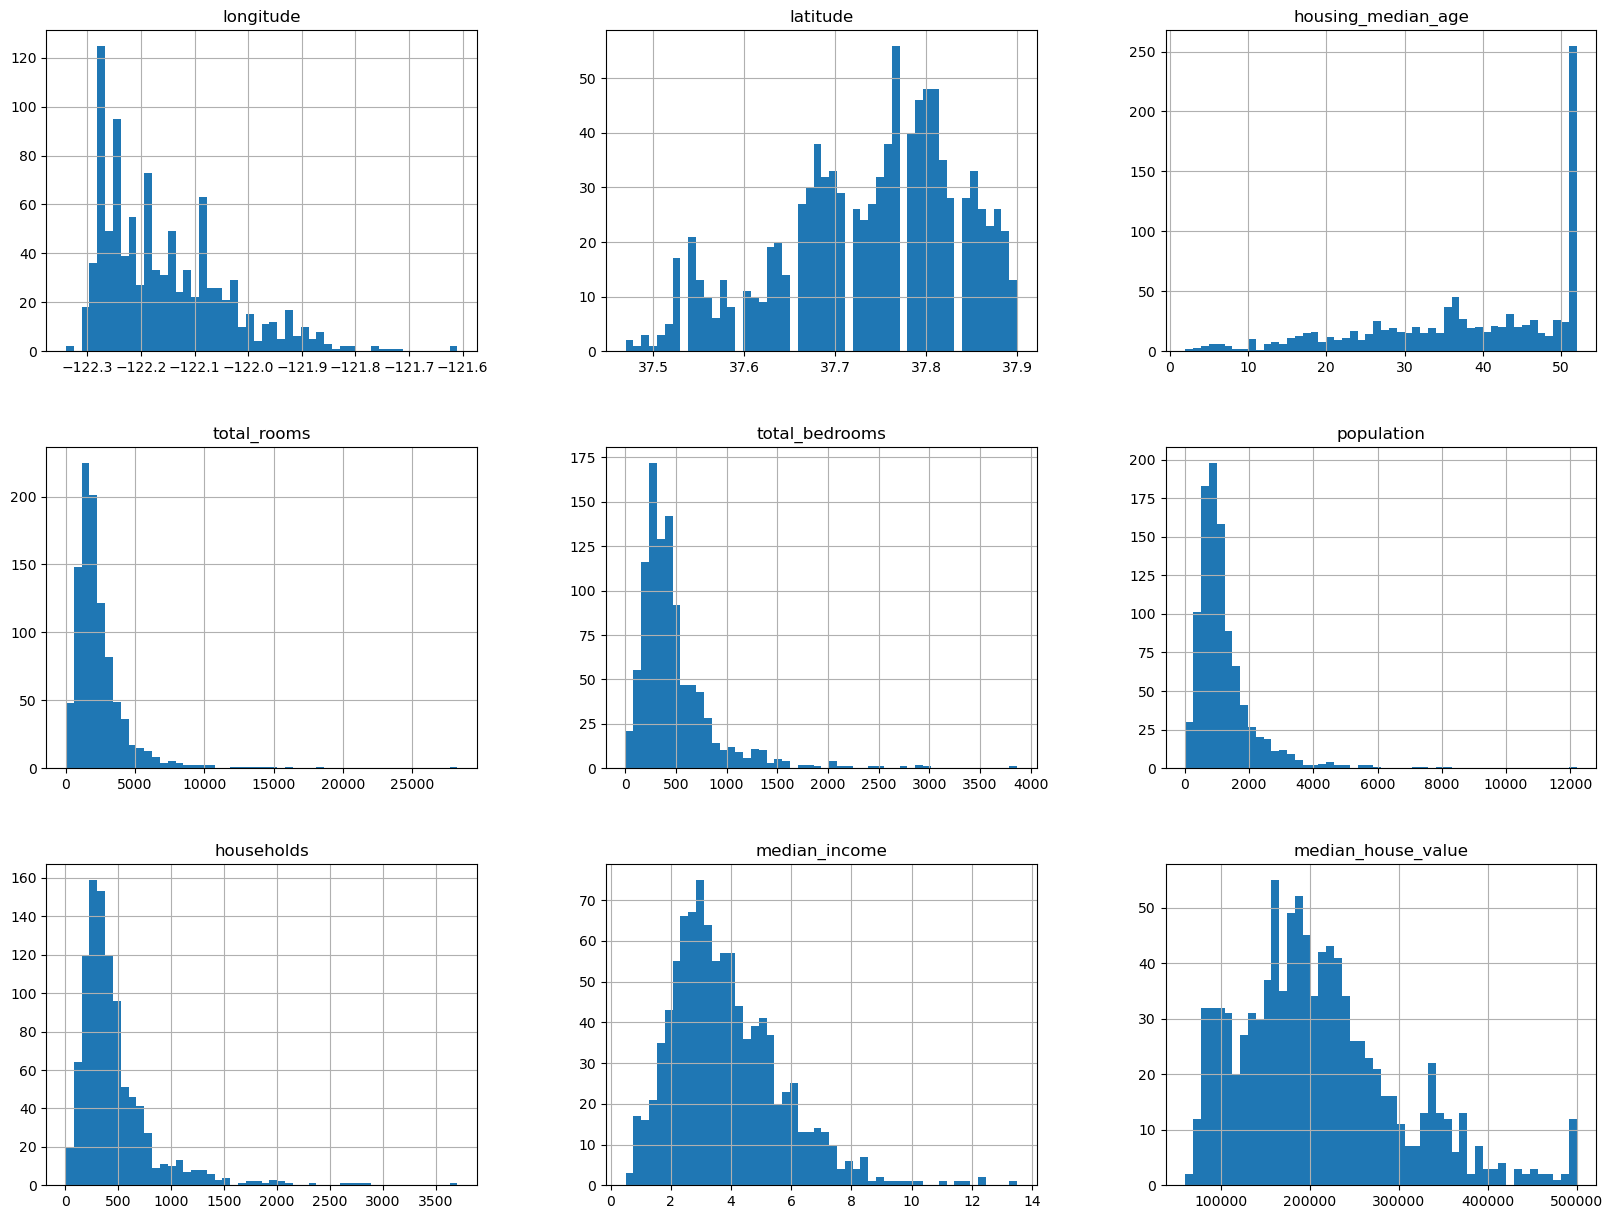

In [41]:

df.hist(bins=50,figsize=(20,15))
plt.show()

In [42]:
import numpy as np


def split_train_test(data, test_radio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_radio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]





In [43]:
X, y = split_train_test(data=df, test_radio=0.2)

print(f"Shape of the X: {X.shape}\n")
print(f"Shape of y: {y.shape}")




Shape of the X: (796, 10)

Shape of y: (198, 10)


In [44]:
from zlib import crc32


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xFFFFFFFF < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]